# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [46]:
#Set up url and search url by calling into OpenWeatherMap
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
search_url = f"{url}&units={units}&appid={weather_api_key}" 

In [44]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
latitudes = []
longitudes = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        latitudes.append(lat_lng[0])
        longitudes.append(lat_lng[1])

# Print the city count to confirm sufficient count
len(cities)

593

In [45]:
# dict = {
#     "City": cities,
#     "Latitude": latitudes,
#     "Longitude": longitudes
# }

# city_df = pd.DataFrame(dict)
# city_df.head()

In [47]:
#Perform API calls
city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1

#Loop through cities
for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    city_url = search_url + "&q=" + city
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    record_count += 1
    
    
    try:
        response = requests.get(city_url).json()
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        max_temp = response["main"]["temp_max"]
        city_humid = response["main"]["humidity"]
        city_cloud = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        country = response["sys"]["country"]
        weather_date = response["dt"]
        
        city_data.append({"City": city,
                        "Lat": city_lat,
                         "Lng" : city_lng,
                         "Max Temp": max_temp,
                         "Humidity": city_humid,
                         "Cloudiness": city_cloud,
                         "Wind Speed": city_wind,
                         "Country": country,
                         "Date": weather_date})

    except:
        print("City not found. Skipping...")
        pass

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nantucket
Processing Record 2 of Set 1 | leh
Processing Record 3 of Set 1 | waddan
Processing Record 4 of Set 1 | benito juarez
Processing Record 5 of Set 1 | nioro
Processing Record 6 of Set 1 | hofn
Processing Record 7 of Set 1 | fukue
Processing Record 8 of Set 1 | vetluzhskiy
Processing Record 9 of Set 1 | faanui
Processing Record 10 of Set 1 | bathsheba
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | vardo
Processing Record 13 of Set 1 | mizpe ramon
City not found. Skipping...
Processing Record 14 of Set 1 | torbay
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | khatanga
Processing Record 17 of Set 1 | lamar
Processing Record 18 of Set 1 | jiuquan
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | kenai
Processing Record 22 of Set 1 | fare
Processing Record 

Processing Record 36 of Set 4 | sorvag
City not found. Skipping...
Processing Record 37 of Set 4 | bambous virieux
Processing Record 38 of Set 4 | tuktoyaktuk
Processing Record 39 of Set 4 | bosaso
Processing Record 40 of Set 4 | mecca
Processing Record 41 of Set 4 | buariki
City not found. Skipping...
Processing Record 42 of Set 4 | colesberg
Processing Record 43 of Set 4 | meulaboh
Processing Record 44 of Set 4 | dharchula
Processing Record 45 of Set 4 | neiafu
Processing Record 46 of Set 4 | mizdah
Processing Record 47 of Set 4 | lyuban
Processing Record 48 of Set 4 | souillac
Processing Record 49 of Set 4 | sigerfjord
City not found. Skipping...
Processing Record 0 of Set 5 | chauk
Processing Record 1 of Set 5 | bowen
Processing Record 2 of Set 5 | port blair
Processing Record 3 of Set 5 | san luis
Processing Record 4 of Set 5 | talnakh
Processing Record 5 of Set 5 | kolaras
Processing Record 6 of Set 5 | klyuchi
Processing Record 7 of Set 5 | magistralnyy
Processing Record 8 of Se

Processing Record 27 of Set 8 | puerto cortes
City not found. Skipping...
Processing Record 28 of Set 8 | fortuna
Processing Record 29 of Set 8 | tillabery
City not found. Skipping...
Processing Record 30 of Set 8 | stephenville crossing
Processing Record 31 of Set 8 | braganca
Processing Record 32 of Set 8 | kraskino
Processing Record 33 of Set 8 | fort nelson
Processing Record 34 of Set 8 | marrakesh
Processing Record 35 of Set 8 | pangnirtung
Processing Record 36 of Set 8 | aljezur
Processing Record 37 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 38 of Set 8 | bilma
Processing Record 39 of Set 8 | broome
Processing Record 40 of Set 8 | turukhansk
Processing Record 41 of Set 8 | codrington
Processing Record 42 of Set 8 | moron
Processing Record 43 of Set 8 | eureka
Processing Record 44 of Set 8 | bolshiye uki
City not found. Skipping...
Processing Record 45 of Set 8 | bonthe
Processing Record 46 of Set 8 | fevralsk
City not found. Skipping...
Processing Record 47

Processing Record 14 of Set 12 | viesite
Processing Record 15 of Set 12 | verkhnyaya inta
Processing Record 16 of Set 12 | kano
Processing Record 17 of Set 12 | suicheng
Processing Record 18 of Set 12 | marzuq
Processing Record 19 of Set 12 | susanville
Processing Record 20 of Set 12 | asfi
Processing Record 21 of Set 12 | nalut
Processing Record 22 of Set 12 | yar-sale
Processing Record 23 of Set 12 | tartus
Processing Record 24 of Set 12 | yanan
City not found. Skipping...
Processing Record 25 of Set 12 | gerede
Processing Record 26 of Set 12 | bullhead city
Processing Record 27 of Set 12 | smithers
Processing Record 28 of Set 12 | ngunguru
Processing Record 29 of Set 12 | banda aceh
Processing Record 30 of Set 12 | villa oliva
City not found. Skipping...
Processing Record 31 of Set 12 | malwan
City not found. Skipping...
Processing Record 32 of Set 12 | camacha
Processing Record 33 of Set 12 | faya
Processing Record 34 of Set 12 | bandar-e anzali
Processing Record 35 of Set 12 | yan

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [48]:
city_df = pd.DataFrame(city_data)
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nantucket,41.2835,-70.0995,24.80,68,1,3.44,US,1611624863
1,leh,34.1667,77.5833,-0.56,64,53,1.21,IN,1611624782
2,waddan,29.1614,16.1390,57.92,37,96,4.65,LY,1611625030
3,benito juarez,19.3850,-99.1650,66.20,42,75,14.97,MX,1611625030
4,nioro,13.3500,-15.7500,67.19,26,0,0.51,GM,1611624938


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [160]:
#Step could have been skipped -> same output for clean_city_data
city_df.count()

City          540
Lat           540
Lng           540
Max Temp      540
Humidity      540
Cloudiness    540
Wind Speed    540
Country       540
Date          540
dtype: int64

In [52]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,5.400000e+02
mean,20.385350,23.588586,48.118944,74.840741,56.801852,7.977241,1.611625e+09
std,33.597212,90.514252,33.215459,18.892151,39.815106,5.853990,8.815641e+01
min,-54.800000,-179.166700,-56.110000,19.000000,0.000000,0.070000,1.611625e+09
25%,-7.309875,-53.706850,30.035000,64.750000,19.750000,3.440000,1.611625e+09
50%,27.015050,29.741000,57.990000,79.500000,75.000000,6.910000,1.611625e+09
75%,48.712525,102.324125,75.000000,88.000000,99.000000,10.360000,1.611625e+09
max,78.218600,179.316700,100.400000,100.000000,100.000000,36.600000,1.611625e+09


In [53]:
#  Get the indices of cities that have humidity over 100%.
humid_df = city_df[city_df["Humidity"] > 100].index
humid_df

Int64Index([], dtype='int64')

In [170]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_df.drop(humid_df, inplace=False)
clean_city_data.to_csv("output_data/cities.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

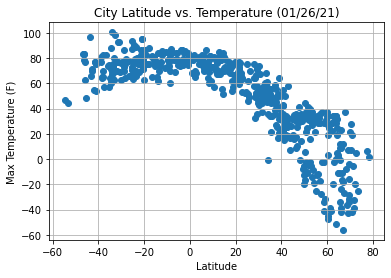

In [148]:
#x = clean_city_data["Lat"]
#y = clean_city_data["Max Temp"]

plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"])#, marker="o", mfc='blue', mec= 'black', mew="0.5")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Temperature (%s)" % time.strftime("%x"))
plt.grid(True)#, markeredgecolor="black", markeredgewidth="0.5")
#plt.savefig("output_data/lat_vs_temp.png")
plt.show()

## Latitude vs. Humidity Plot

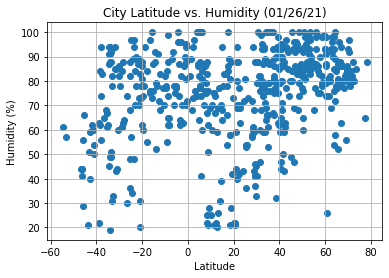

In [150]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"])#, markeredgecolor=k, markeredgewidth="0.5"
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.grid(True)
#plt.savefig("output_data/lat_vs_temp.png")
plt.show()

## Latitude vs. Cloudiness Plot

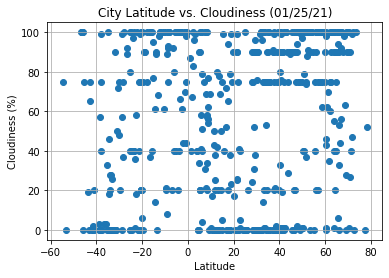

In [85]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"])#, markeredgecolor=k, markeredgewidth="0.5")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.grid(True)
plt.savefig("output_data/lat_vs_temp.png")
plt.show()

## Latitude vs. Wind Speed Plot

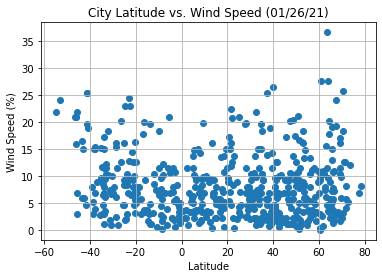

In [161]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"])#, markeredgecolor=k, markeredgewidth="0.5")
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.grid(True)
plt.savefig("output_data/lat_vs_windspeed.png")
plt.show()

## Linear Regression

In [115]:
#Create dataframes for cities in northern and southern hemispheres

north_hemi_df = clean_city_data[clean_city_data["Lat"] > 0]

south_hemi_df = clean_city_data[clean_city_data["Lat"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is:
-0.8482031250699883


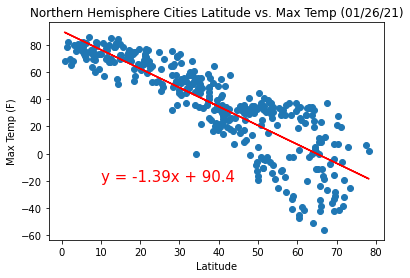

In [162]:
#Create linear regression to print on plot (need linregress from scipy.stats)
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hemi_df["Lat"], north_hemi_df["Max Temp"])
regress_values = north_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Print r-value >>>>>>>>>>>>>> figure out print formatting
print("The r-value is:")
print(rvalue)

#Annotate LR, create labels, then print scatter plot w/ linear regress equation
plt.scatter(north_hemi_df["Lat"], north_hemi_df["Max Temp"])
plt.plot(north_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Northern Hemisphere Cities Latitude vs. Max Temp (%s)" % time.strftime("%x"))
plt.savefig("output_data/north_lat_vs_maxtemp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is:
0.33213388859026205


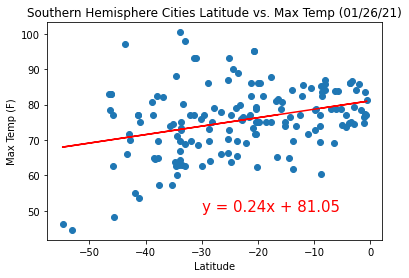

In [163]:
#Create linear regression to print on plot (need linregress from scipy.stats)
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hemi_df["Lat"], south_hemi_df["Max Temp"])
regress_values = south_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Print r-value >>>>>>>>>>>>>> figure out print formatting
print("The r-value is:")
print(rvalue)

#Annotate LR, create labels, then print scatter plot w/ linear regress equation
plt.scatter(south_hemi_df["Lat"], south_hemi_df["Max Temp"])
plt.plot(south_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Southern Hemisphere Cities Latitude vs. Max Temp (%s)" % time.strftime("%x"))
plt.savefig("output_data/south_lat_vs_maxtemp.png")
plt.show()

The r-value is: 0.6082708688906918


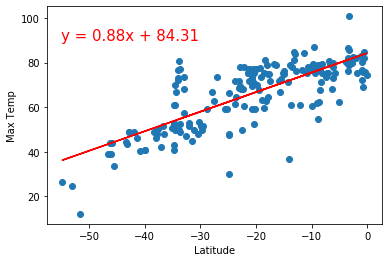

In [26]:
#Southern Hemi Lat vs Max Temp starter data

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is:
0.3520183197172345


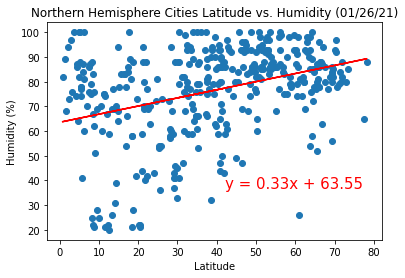

In [164]:
#Create linear regression to print on plot (need linregress from scipy.stats)
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hemi_df["Lat"], north_hemi_df["Humidity"])
regress_values = north_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Print r-value >>>>>>>>>>>>>> figure out print formatting
print("The r-value is:")
print(rvalue)

#Annotate LR, create labels, then print scatter plot w/ linear regress equation
plt.scatter(north_hemi_df["Lat"], north_hemi_df["Humidity"])
plt.plot(north_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq,(42,37),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere Cities Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.savefig("output_data/north_lat_vs_humidity.png")
plt.show()

The r-value is: 0.000543987878808455


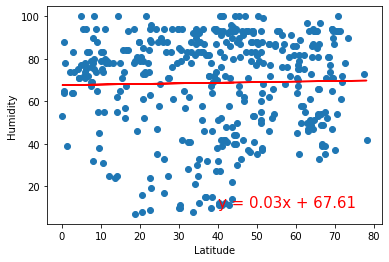

In [27]:
#North Hemi Lat vs Humidity starter data

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is:
0.418257412853662


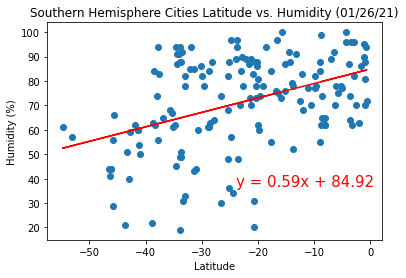

In [165]:
#Create linear regression to print on plot (need linregress from scipy.stats)
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hemi_df["Lat"], south_hemi_df["Humidity"])
regress_values = south_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Print r-value >>>>>>>>>>>>>> figure out print formatting
print("The r-value is:")
print(rvalue)

#Annotate LR, create labels, then print scatter plot w/ linear regress equation
plt.scatter(south_hemi_df["Lat"], south_hemi_df["Humidity"])
plt.plot(south_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq,(-24,37),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere Cities Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.savefig("output_data/south_lat_vs_humidity.png")
plt.show()

The r-value is: 0.014985174297345524


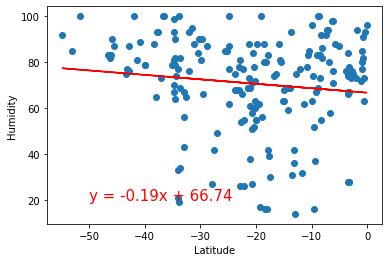

In [28]:
#South Hemi Lat vs Humidity starter data

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is:
0.28926772564880743


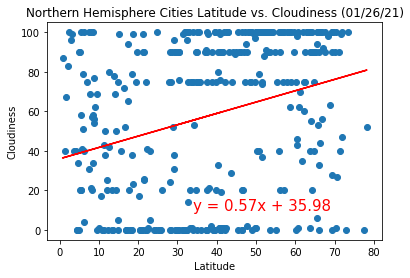

In [166]:
#Create linear regression to print on plot (need linregress from scipy.stats)
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hemi_df["Lat"], north_hemi_df["Cloudiness"])
regress_values = north_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Print r-value >>>>>>>>>>>>>> figure out print formatting
print("The r-value is:")
print(rvalue)

#Annotate LR, create labels, then print scatter plot w/ linear regress equation
plt.scatter(north_hemi_df["Lat"], north_hemi_df["Cloudiness"])
plt.plot(north_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq,(34,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere Cities Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.savefig("output_data/north_lat_vs_cloudiness.png")
plt.show()

The r-value is: 0.0020898727664228514


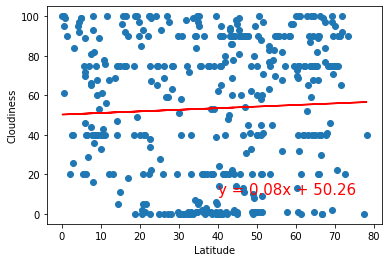

In [29]:
#North Hemi Lat vs Cloudiness starter data

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is:
0.40525222660766713


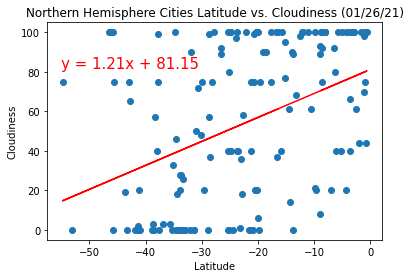

In [167]:
#Create linear regression to print on plot (need linregress from scipy.stats)
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hemi_df["Lat"], south_hemi_df["Cloudiness"])
regress_values = south_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Print r-value >>>>>>>>>>>>>> figure out print formatting
print("The r-value is:")
print(rvalue)

#Annotate LR, create labels, then print scatter plot w/ linear regress equation
plt.scatter(south_hemi_df["Lat"], south_hemi_df["Cloudiness"])
plt.plot(south_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq,(-55,82),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere Cities Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.savefig("output_data/south_lat_vs_cloudiness.png")
plt.show()

The r-value is: 0.0035263772085582894


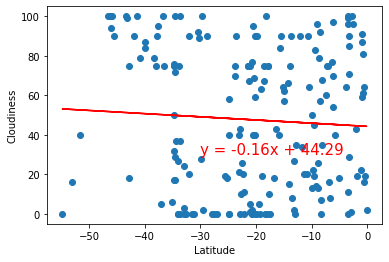

In [30]:
#South Hemi Lat vs Cloudiness starter data

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is:
0.11048595262873709


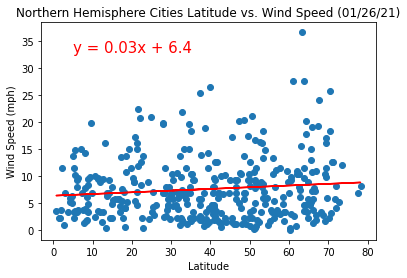

In [168]:
#Create linear regression to print on plot (need linregress from scipy.stats)
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hemi_df["Lat"], north_hemi_df["Wind Speed"])
regress_values = north_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Print r-value >>>>>>>>>>>>>> figure out print formatting
print("The r-value is:")
print(rvalue)

#Annotate LR, create labels, then print scatter plot w/ linear regress equation
plt.scatter(north_hemi_df["Lat"], north_hemi_df["Wind Speed"])
plt.plot(north_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq,(5,33),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere Cities Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.savefig("output_data/north_lat_vs_windspeed.png")
plt.show()

The r-value is: 0.04019723576144484


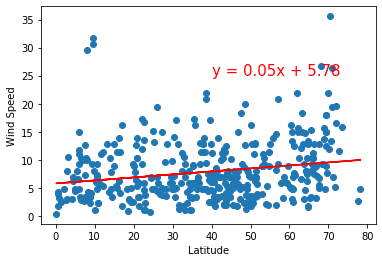

In [31]:
#North Hemi Lat vs Wind Speed starter data

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is:
-0.4061392495744357


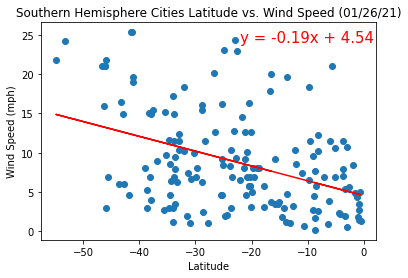

In [169]:
#Create linear regression to print on plot (need linregress from scipy.stats)
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hemi_df["Lat"], south_hemi_df["Wind Speed"])
regress_values = south_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Print r-value >>>>>>>>>>>>>> figure out print formatting
print("The r-value is:")
print(rvalue)

#Annotate LR, create labels, then print scatter plot w/ linear regress equation
plt.scatter(south_hemi_df["Lat"], south_hemi_df["Wind Speed"])
plt.plot(south_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq,(-22,24),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere Cities Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.savefig("output_data/south_lat_vs_windspeed.png")
plt.show()

The r-value is: 0.017128274759839232


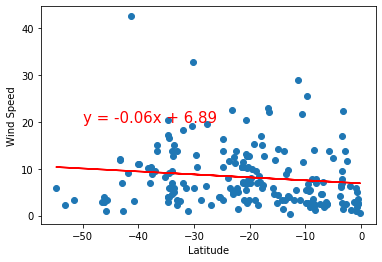

In [32]:
#South Hemi Lat vs Wind Speed starter data